# Data Engineer

## Bağlantı

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

adc.json  drive  sample_data


## Modul

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset import

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/diabetes/data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data analysis

## Explorer datasets

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

### Statistical summary

In [ ]:
df.describe()

## Data Cleaning

In [ ]:
df.shape

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

### Find the null values 

In [ ]:
df.isnull().sum()

In [ ]:
df.columns 

### Check the no of zero values in dataset

In [ ]:
print('No. of zero values in Glucose',df[df['Glucose']==0].shape[0]) 

In [ ]:
print('No. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])

In [ ]:
print('No. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])

In [ ]:
print('No. of zero values in Insulin',df[df['Insulin']==0].shape[0])

In [ ]:
print('No. of zero values in BMI',df[df['BMI']==0].shape[0])

### Replace no of zero vallues with mean of that columns

In [ ]:
df.columns

In [ ]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('No. of zero values in Glucose', df[df['Glucose']==0].shape[0])

In [ ]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [ ]:
df.describe()

## Data Visualization

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,10))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ',P)
plt.grid()
plt.show()

### Histograms

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

### Scatter plot

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20));

### Pairplot

In [ ]:
sns.pairplot(data=df, hue='Outcome')
plt.show()

### Analyzing relationships between variables

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Data Science

## Split the data frame into X & y

In [ ]:
target_name = 'Outcome'

y= df[target_name]
X= df.drop(target_name, axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Apply Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

## Train - Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=42)

In [ ]:
X_test.shape,y_test.shape

((154, 8), (154,))

In [ ]:
X_train.shape,y_train.shape

((614, 8), (614,))

## Build the CLASSIFICATION Algorithms

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### KNeighborsClssifler (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Navie-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

### Logistic Regression

In [ ]:
X_test.shape 

(154, 8)

In [ ]:
lr_pred=lr.predict(X_test)

In [ ]:
lr_pred.shape 

(154,)

### KNN

In [ ]:
knn_pred=knn.predict(X_test)

### Naivie Bayes

In [ ]:
nb_pred=nb.predict(X_test)

### Support Vector Machine (SVM)

In [ ]:
sv_pred=sv.predict(X_test)

### Decesion Tree

In [ ]:
dt_pred=dt.predict(X_test)

### Random Forest

In [ ]:
rf_pred=rf.predict(X_test)

## Model Evaluation

### Train Score and Test Score

In [ ]:
# Logistic Regression
from sklearn.metrics import accuracy_score
print('Train Accuracy of Logistic Regression',lr.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Logistic Regression',lr.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Logistic Regression',accuracy_score(y_test,lr_pred)*100)

Train Accuracy of Logistic Regression 77.0358306188925
Accuracy (TEST) score of Logistic Regression 75.32467532467533
Accuracy (TEST) score of Logistic Regression 75.32467532467533


In [ ]:
# KNN
print('Train Accuracy of K-Nearest Neighbors',knn.score(X_train,y_train)*100)
print('Accuracy (TEST) score of K-Nearest Neighbors',knn.score(X_test,y_test)*100)
print('Accuracy (TEST) score of K-Nearest Neighbors',accuracy_score(y_test,knn_pred)*100)

Train Accuracy of K-Nearest Neighbors 82.08469055374593
Accuracy (TEST) score of K-Nearest Neighbors 68.83116883116884
Accuracy (TEST) score of K-Nearest Neighbors 68.83116883116884


In [ ]:
# Navie-Bayes
print('Train Accuracy of Naive Bayes classifier',nb.score(X_train,y_train)*100)
print('Accuracy (TEST) Naive Bayes classifier',nb.score(X_test,y_test)*100)
print('Accuracy (TEST) Naive Bayes classifier',accuracy_score(y_test,nb_pred)*100)

Train Accuracy of Naive Bayes classifier 75.2442996742671
Accuracy (TEST) Naive Bayes classifier 76.62337662337663
Accuracy (TEST) Naive Bayes classifier 76.62337662337663


In [ ]:
# SVM
print('Train Accuracy of Support Vector Classification',sv.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Support Vector Classification',sv.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Support Vector Classification',accuracy_score(y_test,sv_pred)*100)

Train Accuracy of Support Vector Classification 82.89902280130293
Accuracy (TEST) score of Support Vector Classification 72.72727272727273
Accuracy (TEST) score of Support Vector Classification 72.72727272727273


In [ ]:
# Decesion Tree
print('Train Accuracy of Decision Tree',dt.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Decision Tree',dt.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Decision Tree',accuracy_score(y_test,dt_pred)*100)

Train Accuracy of Decision Tree 100.0
Accuracy (TEST) score of Decision Tree 75.32467532467533
Accuracy (TEST) score of Decision Tree 75.32467532467533


In [ ]:
# Random Forest
print('Train Accuracy of Random forest',rf.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Random forest',rf.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Random forest',accuracy_score(y_test,rf_pred)*100)

Train Accuracy of Random forest 100.0
Accuracy (TEST) score of Random forest 75.97402597402598
Accuracy (TEST) score of Random forest 75.97402597402598


### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,lr_pred)
cm 

array([[79, 20],
       [18, 37]])

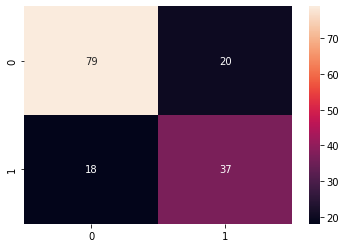

In [ ]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='d')

In [ ]:
TN= cm[0,0]
FP= cm[0,1]
FN= cm[1,0]
TP= cm[1,1]

In [ ]:
TN, FP, FN, TP 

(79, 20, 18, 37)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 79
TN - False Positive 20
TN - False Negative 18
TN - True Positive 37
Accuracy Rate: 75.32467532467533
Misclassification Rate: 24.675324675324674


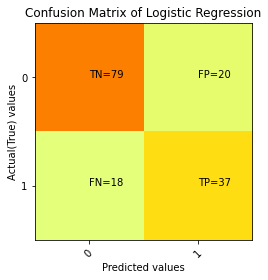

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]+'='+str(cm[i][j])))
plt.show()

In [ ]:
pd.crosstab(y_test, lr_pred, margins=False)

col_0,0,1
Outcome,,
0,79,20
1,18,37


In [ ]:
pd.crosstab(y_test, lr_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,79,20,99
1,18,37,55
All,97,57,154


In [ ]:
pd.crosstab(y_test, lr_pred, rownames=['Actual values'], 
            colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,79,20,99
1,18,37,55
All,97,57,154


### Precision(PPV-Positive Predictive Value)

In [ ]:
TP,FP

(37, 20)

In [ ]:
Precision=TP/(TP+FP)
Precision 

0.6491228070175439

In [ ]:
35/(35+16)

0.6862745098039216

In [ ]:
precision_Score = TP / float(TP + FP)*100
print('Precision score : {0:0.4f}'.format(precision_Score))

Precision score : 64.9123


In [ ]:
from sklearn.metrics import precision_score
print('precision Score is:', precision_score(y_test,lr_pred)*100)
print('Micro Average precision Score is:', precision_score(y_test,lr_pred,average='micro')*100)
print('Macro Average precision Score is:', precision_score(y_test,lr_pred,average='macro')*100)
print('Weighted Average precision Score is:', precision_score(y_test,lr_pred,average='weighted')*100)
print('precision Score on Non weighted score is:', precision_score(y_test,lr_pred, average=None)*100)

precision Score is: 64.91228070175438
Micro Average precision Score is: 75.32467532467533
Macro Average precision Score is: 73.17778983541328
Weighted Average precision Score is: 75.53936387360154
precision Score on Non weighted score is: [81.44329897 64.9122807 ]


In [ ]:
print('Classification Report of Logistic Regression: \n', classification_report(y_test,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.8144    0.7980    0.8061        99
           1     0.6491    0.6727    0.6607        55

    accuracy                         0.7532       154
   macro avg     0.7318    0.7354    0.7334       154
weighted avg     0.7554    0.7532    0.7542       154



### False Positive Rate (FPR)

In [ ]:
FPR = FP / float(FP+TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR))

False Positive Rate: 20.2020


In [ ]:
FP, TN

(20, 79)

In [ ]:
16/(16+83)

0.16161616161616163

### Specificity

In [ ]:
specificity = TN/(TN+FP)*100
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 79.7980


### F1-Score

In [ ]:
from sklearn.metrics import f1_score
print('f1_score of macro :',f1_score(y_test, lr_pred)*100)

f1_score of macro : 66.07142857142858


In [ ]:
print('Micro Average F1_Score is:', f1_score(y_test,lr_pred,average='micro')*100)
print('Macro Average F1_Score is:', f1_score(y_test,lr_pred,average='macro')*100)
print('Weighted Average F1_Score is:', f1_score(y_test,lr_pred,average='weighted')*100)
print('F1_Score on Non weighted is:', f1_score(y_test,lr_pred, average=None)*100)

Micro Average F1_Score is: 75.32467532467531
Macro Average F1_Score is: 73.34183673469387
Weighted Average F1_Score is: 75.41909620991254
F1_Score on Non weighted is: [80.6122449  66.07142857]


### Classification Report of Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report of Logistic Regression: \n', classification_report(y_test,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.8144    0.7980    0.8061        99
           1     0.6491    0.6727    0.6607        55

    accuracy                         0.7532       154
   macro avg     0.7318    0.7354    0.7334       154
weighted avg     0.7554    0.7532    0.7542       154



## ROC Curve and ROC AUC

### Confusion Logistic Regression

In [ ]:
auc = roc_auc_score(y_test, lr_pred)
print('ROC AUC SCORE of Logistic Regression is',auc)

ROC AUC SCORE of Logistic Regression is 0.7353535353535354


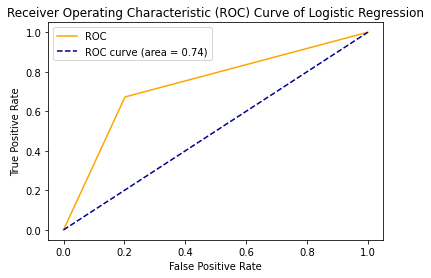

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend()
plt.show()

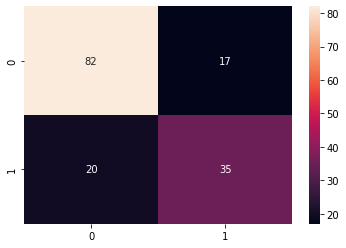

In [ ]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d')

### Confusion Matrix of KNN

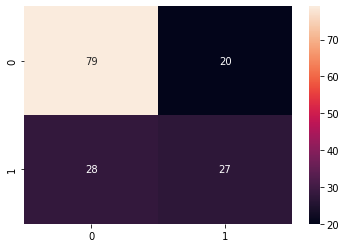

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='d')

In [ ]:
cm = confusion_matrix(y_test, knn_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 79
TN - False Positive 20
TN - False Negative 28
TN - True Positive 27
Accuracy Rate: 68.83116883116884
Misclassification Rate: 31.16883116883117


In [ ]:
print('Classification Report of KNN: \n', classification_report(y_test,knn_pred,digits=4))

Classification Report of KNN: 
               precision    recall  f1-score   support

           0     0.7383    0.7980    0.7670        99
           1     0.5745    0.4909    0.5294        55

    accuracy                         0.6883       154
   macro avg     0.6564    0.6444    0.6482       154
weighted avg     0.6798    0.6883    0.6821       154



### Are Under Curve of KNN

In [ ]:
auc = roc_auc_score(y_test, knn_pred)
print('ROC AUC SCORE of KNN is',auc)

ROC AUC SCORE of KNN is 0.6444444444444446


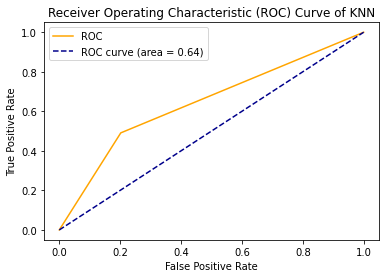

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of KNN')
plt.legend()
plt.show()

### Confusion Matrix of Naive Bayes

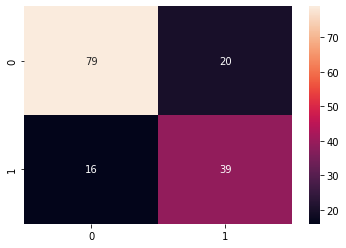

In [ ]:
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True,fmt='d')

In [ ]:
cm = confusion_matrix(y_test, nb_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 79
TN - False Positive 20
TN - False Negative 16
TN - True Positive 39
Accuracy Rate: 76.62337662337663
Misclassification Rate: 23.376623376623375


In [ ]:
print('Classification Report of Naive Bayes : \n', classification_report(y_test,knn_pred,digits=4))

Classification Report of Naive Bayes : 
               precision    recall  f1-score   support

           0     0.7383    0.7980    0.7670        99
           1     0.5745    0.4909    0.5294        55

    accuracy                         0.6883       154
   macro avg     0.6564    0.6444    0.6482       154
weighted avg     0.6798    0.6883    0.6821       154



### Are Under Curve of Naive Bayes

In [ ]:
auc = roc_auc_score(y_test, knn_pred)
print('ROC AUC SCORE of Naive Bayes is',auc)

ROC AUC SCORE of Naive Bayes is 0.6444444444444446


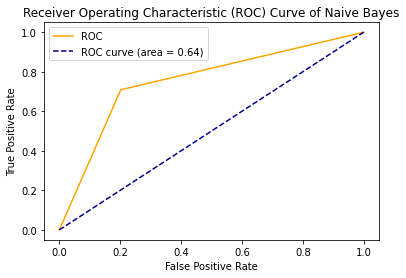

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bayes')
plt.legend()
plt.show()

### Confusion Matrix of SVM

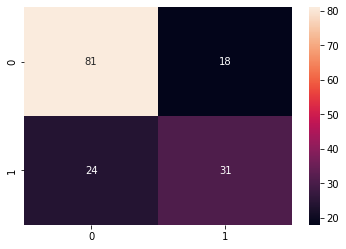

In [ ]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True,fmt='d')

In [ ]:
cm = confusion_matrix(y_test, sv_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 81
TN - False Positive 18
TN - False Negative 24
TN - True Positive 31
Accuracy Rate: 72.72727272727273
Misclassification Rate: 27.27272727272727


In [ ]:
print('Classification Report of SVM : \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM : 
               precision    recall  f1-score   support

           0     0.7714    0.8182    0.7941        99
           1     0.6327    0.5636    0.5962        55

    accuracy                         0.7273       154
   macro avg     0.7020    0.6909    0.6951       154
weighted avg     0.7219    0.7273    0.7234       154



### Are Under Curve of SVM

In [ ]:
auc = roc_auc_score(y_test, sv_pred)
print('ROC AUC SCORE of SVM is',auc)

ROC AUC SCORE of SVM is 0.6909090909090908


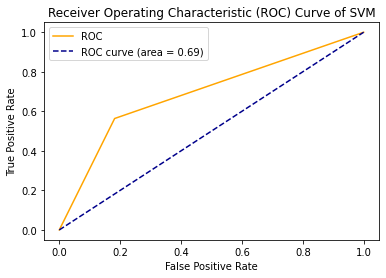

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend()
plt.show()

### Confusion Matrix of Decesion Tree

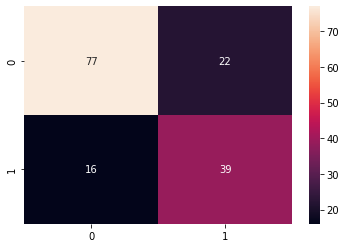

In [ ]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt='d')

In [ ]:
cm = confusion_matrix(y_test, dt_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 77
TN - False Positive 22
TN - False Negative 16
TN - True Positive 39
Accuracy Rate: 75.32467532467533
Misclassification Rate: 24.675324675324674


In [ ]:
print('Classification Report of Decesion Tree: \n', classification_report(y_test,dt_pred,digits=4))

Classification Report of Decesion Tree: 
               precision    recall  f1-score   support

           0     0.8280    0.7778    0.8021        99
           1     0.6393    0.7091    0.6724        55

    accuracy                         0.7532       154
   macro avg     0.7337    0.7434    0.7372       154
weighted avg     0.7606    0.7532    0.7558       154



### Are Under Curve of Decesion Tree

In [ ]:
auc = roc_auc_score(y_test, dt_pred)
print('ROC AUC SCORE of Decesion Tree is',auc)

ROC AUC SCORE of Decesion Tree is 0.7434343434343433


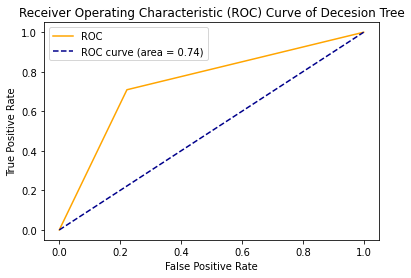

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decesion Tree')
plt.legend()
plt.show()

### Confusion Matrix of Random Forest

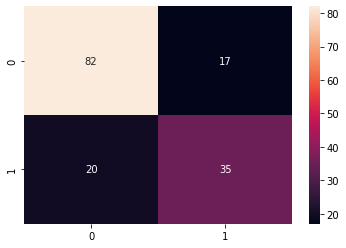

In [ ]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d')

In [ ]:
cm = confusion_matrix(y_test, rf_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 82
TN - False Positive 17
TN - False Negative 20
TN - True Positive 35
Accuracy Rate: 75.97402597402598
Misclassification Rate: 24.025974025974026


In [ ]:
print('Classification Report of Random Forest: \n', classification_report(y_test,rf_pred,digits=4))

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0     0.8039    0.8283    0.8159        99
           1     0.6731    0.6364    0.6542        55

    accuracy                         0.7597       154
   macro avg     0.7385    0.7323    0.7351       154
weighted avg     0.7572    0.7597    0.7582       154



### Are Under Curve of Random Forest

In [ ]:
auc = roc_auc_score(y_test, rf_pred)
print('ROC AUC SCORE of Decesion Tree is',auc)

ROC AUC SCORE of Decesion Tree is 0.7323232323232323


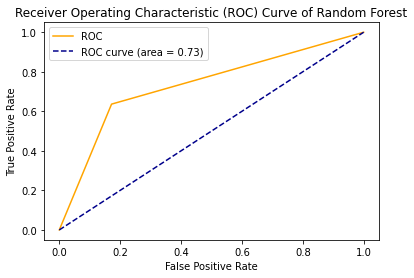

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend()
plt.show()